In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'



# 1. Data (preparing and loading)



In [ ]:
weight = 0.7
bias = 0.3

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = X*weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize = (10, 7))

  #plot the training data in blue'
  plt.scatter(train_data, train_labels, c='b', s=4, label = 'Training Data')

  #plot the testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

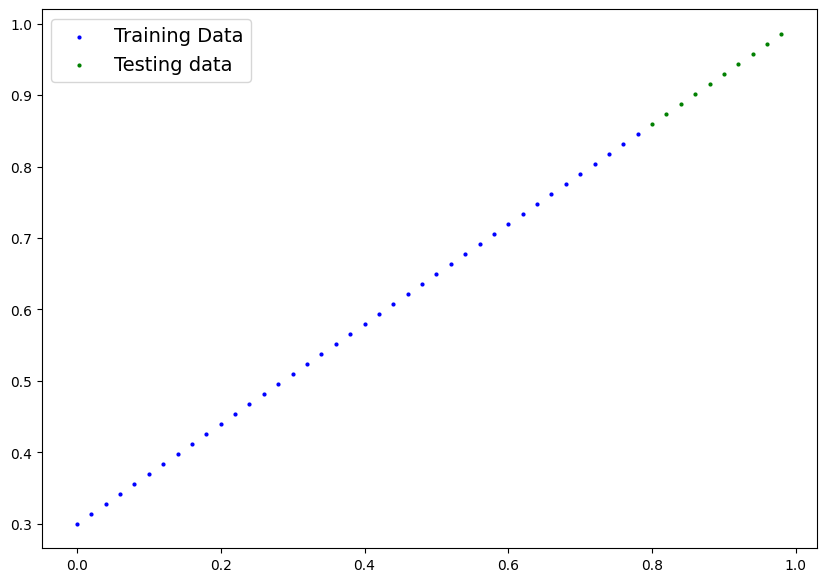

In [ ]:
plot_predictions();

# 2. Build model

In [ ]:
class LiearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))

    #Fprward defines the computation of the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias  # y = mx+b


In [ ]:
torch.manual_seed(42)

model_0 = LiearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Making predictions using torch.inference_mode()¶

In [ ]:
with torch.inference_mode():
  # inference ~~ predictions
  y_preds = model_0(X_test)


In [ ]:
#check the predictions
print(f"number of testing samples : {len(X_test)}")
print(f"number of predictions made : {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

number of testing samples : 10
number of predictions made : 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


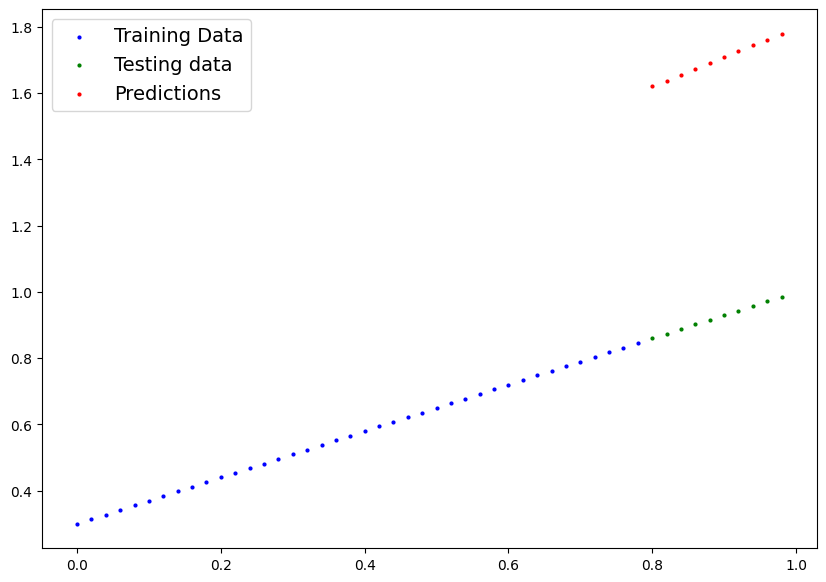

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.7608],
        [-0.7645],
        [-0.7681],
        [-0.7718],
        [-0.7754],
        [-0.7790],
        [-0.7827],
        [-0.7863],
        [-0.7900],
        [-0.7936]])

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.01)

### Create an optimizer loop in pytorch

In [ ]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training

  # Put the model in the training mode
  model_0.train()

  # 1. Forward pass on train data using the trained model
  y_preds = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_preds, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing

  # Put the model in eval mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass on test data
    test_preds = model_0(X_test)

    # 2. calculate the loss on the test data
    test_loss = loss_fn( test_preds, y_test.type(torch.float))

    # print what is happening
    if epoch % 10== 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.02268887683749199 | MAE Test Loss: 0.05342676490545273 
Epoch: 10 | MAE Train Loss: 0.012654691934585571 | MAE Test Loss: 0.022653799504041672 
Epoch: 20 | MAE Train Loss: 0.002544936491176486 | MAE Test Loss: 0.004048639442771673 
Epoch: 30 | MAE Train Loss: 0.0031812055967748165 | MAE Test Loss: 0.007190627045929432 
Epoch: 40 | MAE Train Loss: 0.0010826386278495193 | MAE Test Loss: 0.0028832019306719303 
Epoch: 50 | MAE Train Loss: 0.0011439599329605699 | MAE Test Loss: 0.00034206509008072317 
Epoch: 60 | MAE Train Loss: 0.003119466360658407 | MAE Test Loss: 0.006149208638817072 
Epoch: 70 | MAE Train Loss: 0.0022649287711828947 | MAE Test Loss: 0.0006484508630819619 
Epoch: 80 | MAE Train Loss: 0.0011364907259121537 | MAE Test Loss: 0.00014607310004066676 
Epoch: 90 | MAE Train Loss: 0.0010146737331524491 | MAE Test Loss: 0.003049141261726618 


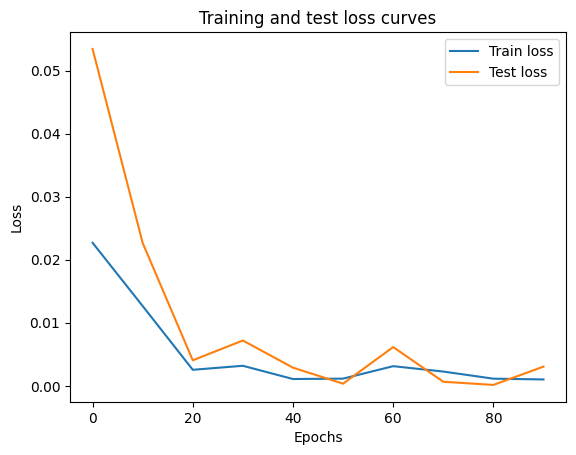

In [ ]:
#Plot the loss corves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.7003])), ('bias', tensor([0.3015]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


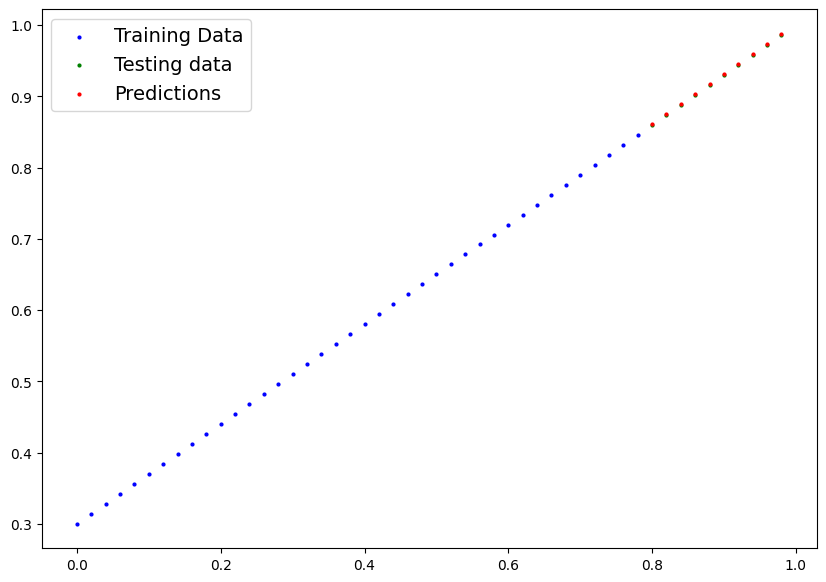

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [ ]:
# save the trained model
from pathlib import Path

# create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#create model to save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3 save the model state dic
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)

saving model to models/01_pytorch_workflow_model.pth


In [ ]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model.pth

-rw-r--r-- 1 root root 1668 Oct 11 18:01 models/01_pytorch_workflow_model.pth


In [ ]:
loaded_model_0 = LiearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<ipython-input-26-6f69c769f7f2>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])